<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          1100 non-null   int64  
 1   age                  1100 non-null   int64  
 2   gender               1100 non-null   object 
 3   income               1100 non-null   int64  
 4   account_balance      1100 non-null   int64  
 5   credit_score         1100 non-null   int64  
 6   loan_amount          1100 non-null   int64  
 7   loan_duration        1100 non-null   int64  
 8   interest_rate        1100 non-null   float64
 9   employment_status    1100 non-null   object 
 10  education_level      1100 non-null   object 
 11  marital_status       1100 non-null   object 
 12  num_of_dependents    1100 non-null   int64  
 13  housing_status       1100 non-null   object 
 14  years_with_bank      1100 non-null   int64  
 15  num_of_products      1100 non-null   i

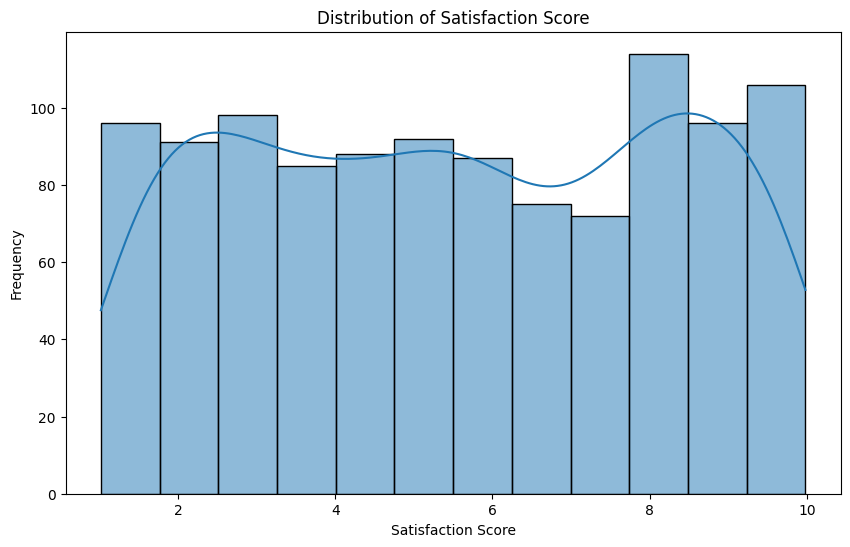

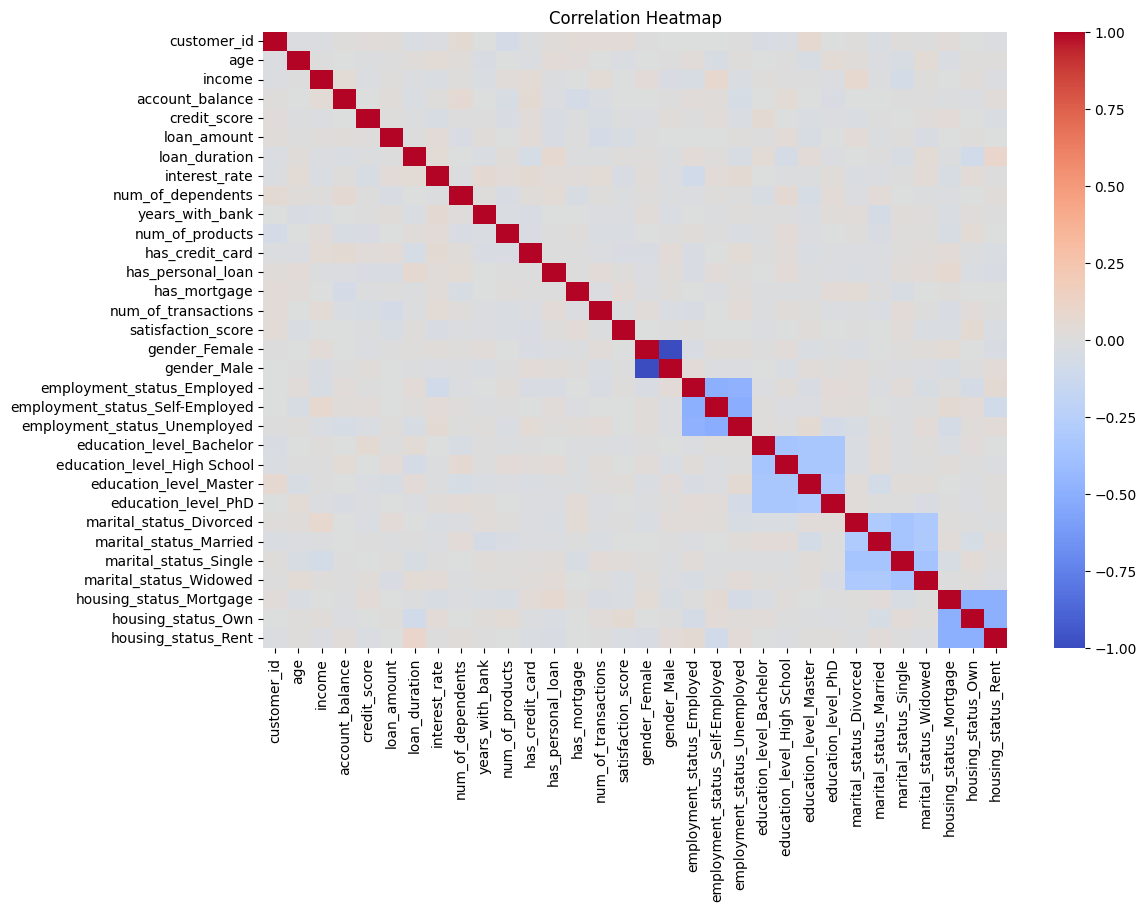

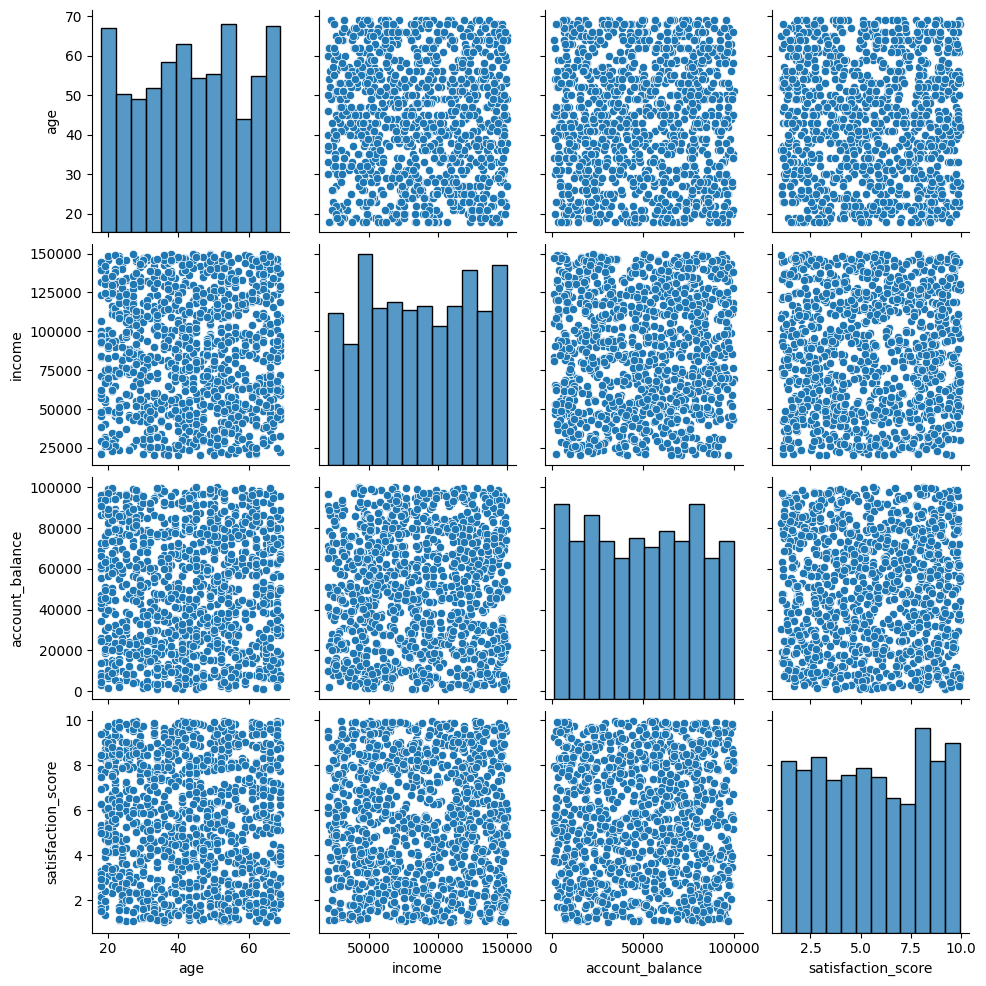

Mean Squared Error: 7.447762112085019
Root Mean Squared Error: 2.729058832653671
R-squared: -0.026955941258145488


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = '/content/sample_data/banking_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())

# Display summary statistics of the dataset
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

# Plot the distribution of the satisfaction score
plt.figure(figsize=(10, 6))
sns.histplot(data['satisfaction_score'], kde=True)
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

# Fill missing values for numerical columns with mean
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Fill missing values for categorical columns with mode
categorical_columns = data.select_dtypes(include=[object]).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Select a few features for pairplot
# Replace 'age', 'income', 'balance' with actual feature names
selected_features = ['age', 'income', 'account_balance', 'satisfaction_score']
sns.pairplot(data[selected_features])
plt.show()

# Define the features (X) and the target variable (y)
X = data_encoded.drop(columns=['satisfaction_score'])
y = data_encoded['satisfaction_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Let's break down the code step by step:

### Importing Libraries
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
```
- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **matplotlib.pyplot**: For plotting graphs.
- **seaborn**: For advanced data visualization.
- **train_test_split**: For splitting the dataset into training and testing sets.
- **LinearRegression**: For performing linear regression.
- **mean_squared_error, r2_score**: For evaluating the performance of the regression model.

### Loading the Data
```python
file_path = '/content/sample_data/banking_data.csv'
data = pd.read_csv(file_path)
```
- **file_path**: Specifies the location of the dataset.
- **data**: Loads the dataset into a pandas DataFrame.

### Displaying Basic Information and Summary Statistics
```python
print(data.info())
print(data.describe())
```
- **data.info()**: Displays basic information about the dataset such as the number of entries, columns, and data types.
- **data.describe()**: Provides summary statistics of the numerical columns in the dataset.

### Checking for Missing Values
```python
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])
```
- **isnull()**: Checks for missing values.
- **sum()**: Sums up the missing values for each column.
- **missing_values[missing_values > 0]**: Prints columns that have missing values.

### Plotting the Distribution of the Satisfaction Score
```python
plt.figure(figsize=(10, 6))
sns.histplot(data['satisfaction_score'], kde=True)
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()
```
- **plt.figure(figsize=(10, 6))**: Sets the size of the plot.
- **sns.histplot**: Plots a histogram with a kernel density estimate for the 'satisfaction_score' column.
- **plt.title, plt.xlabel, plt.ylabel**: Adds title and labels to the plot.
- **plt.show()**: Displays the plot.

### Filling Missing Values
```python
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

categorical_columns = data.select_dtypes(include=[object]).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))
```
- **select_dtypes(include=[np.number])**: Selects numerical columns.
- **fillna(data[numeric_columns].mean())**: Fills missing numerical values with the mean.
- **select_dtypes(include=[object])**: Selects categorical columns.
- **apply(lambda x: x.fillna(x.mode()[0]))**: Fills missing categorical values with the mode.

### Converting Categorical Variables to Numerical
```python
data_encoded = pd.get_dummies(data)
```
- **pd.get_dummies**: Converts categorical variables into one-hot encoded variables.

### Plotting the Correlation Heatmap
```python
plt.figure(figsize=(12, 8))
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
```
- **plt.figure(figsize=(12, 8))**: Sets the size of the plot.
- **data_encoded.corr()**: Computes the correlation matrix.
- **sns.heatmap**: Plots the heatmap of the correlation matrix.
- **annot=False**: Disables annotation of the heatmap cells.
- **cmap='coolwarm'**: Sets the color map.
- **plt.title, plt.show()**: Adds title and displays the plot.

### Plotting Pairplots of Selected Features
```python
selected_features = ['age', 'income', 'account_balance', 'satisfaction_score']
sns.pairplot(data[selected_features])
plt.show()
```
- **selected_features**: List of selected feature names.
- **sns.pairplot**: Plots pairwise relationships in the dataset for the selected features.
- **plt.show()**: Displays the plot.

### Defining Features and Target Variable
```python
X = data_encoded.drop(columns=['satisfaction_score'])
y = data_encoded['satisfaction_score']
```
- **X**: Feature matrix obtained by dropping the target variable (`satisfaction_score`).
- **y**: Target vector containing the `satisfaction_score` column.

### Splitting the Data
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- **train_test_split**: Splits the data into training (80%) and testing (20%) sets.
- **random_state=42**: Ensures reproducibility of the split.

### Creating and Training the Linear Regression Model
```python
model = LinearRegression()
model.fit(X_train, y_train)
```
- **LinearRegression()**: Creates an instance of the linear regression model.
- **fit**: Trains the model using the training data.

### Making Predictions
```python
y_pred = model.predict(X_test)
```
- **predict**: Makes predictions on the test set.

### Calculating and Displaying Performance Metrics
```python
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')
```
- **mean_squared_error**: Calculates the mean squared error between the actual and predicted values.
- **np.sqrt**: Computes the square root to obtain the root mean squared error.
- **r2_score**: Calculates the R-squared value, which indicates the proportion of variance explained by the model.
- **print**: Displays the performance metrics.

This code performs data preprocessing, visualization, and linear regression to predict the 'satisfaction_score' variable, and evaluates the model's performance using various metrics.

#Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data
file_path = '/content/sample_data/banking_data.csv'
data = pd.read_csv(file_path)

# Define the feature matrix (X) and the target vector (y)
X = data.drop(columns=['has_mortgage', 'customer_id'])
y = data['has_mortgage']

# Preprocessing for numerical data
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Function to predict new test data
def predict_new_data(new_data):
    return model.predict(new_data)

# Example usage with new test data
new_test_data = X_test.iloc[:5]
predictions = predict_new_data(new_test_data)
print(f'Predictions for new test data: {predictions}')



Accuracy: 0.50
Predictions for new test data: [0 0 1 0 0]


Sure, let's break down the code step by step:

### Importing Libraries
```python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
```
- **pandas**: Used for data manipulation and analysis.
- **train_test_split**: Splits the dataset into training and testing sets.
- **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.
- **OneHotEncoder**: Encodes categorical features as a one-hot numeric array.
- **ColumnTransformer**: Applies transformers to columns of a DataFrame.
- **Pipeline**: Sequentially applies a list of transforms and a final estimator.
- **SimpleImputer**: Provides basic strategies for imputing missing values.
- **LogisticRegression**: Implements logistic regression for binary classification.
- **accuracy_score**: Calculates the accuracy of the classification.

### Loading the Data
```python
file_path = '/mnt/data/banking_data.csv'
data = pd.read_csv(file_path)
```
- **file_path**: Specifies the location of the dataset.
- **data**: Loads the dataset into a pandas DataFrame.

### Defining Features and Target
```python
X = data.drop(columns=['has_mortgage', 'customer_id'])
y = data['has_mortgage']
```
- **X**: Feature matrix obtained by dropping the target variable (`has_mortgage`) and `customer_id` from the DataFrame.
- **y**: Target vector containing the `has_mortgage` column.

### Preprocessing Numerical Data
```python
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
```
- **numerical_features**: Selects numerical columns from `X`.
- **numerical_transformer**: Defines a pipeline for preprocessing numerical data:
  - **SimpleImputer**: Replaces missing values with the median.
  - **StandardScaler**: Standardizes the numerical features.

### Preprocessing Categorical Data
```python
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
```
- **categorical_features**: Selects categorical columns from `X`.
- **categorical_transformer**: Defines a pipeline for preprocessing categorical data:
  - **SimpleImputer**: Replaces missing values with the constant 'missing'.
  - **OneHotEncoder**: Converts categorical variables into a one-hot encoded format.

### Combining Preprocessing Steps
```python
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])
```
- **preprocessor**: Combines the numerical and categorical preprocessing steps into a single transformer.

### Creating the Logistic Regression Model
```python
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))])
```
- **model**: Defines a pipeline that first preprocesses the data and then applies a logistic regression classifier.

### Splitting the Data
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
- **train_test_split**: Splits the data into training (80%) and testing (20%) sets.
- **random_state=42**: Ensures reproducibility of the split.

### Training the Model
```python
model.fit(X_train, y_train)
```
- **fit**: Trains the logistic regression model using the training data.

### Making Predictions
```python
y_pred = model.predict(X_test)
```
- **predict**: Makes predictions on the test set.

### Evaluating the Model
```python
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
```
- **accuracy_score**: Computes the accuracy of the model on the test set.
- **print**: Displays the accuracy.

### Predicting New Data
```python
def predict_new_data(new_data):
    return model.predict(new_data)
```
- **predict_new_data**: Defines a function to make predictions on new data.

### Example Usage with New Test Data
```python
new_test_data = X_test.iloc[:5]
predictions = predict_new_data(new_test_data)
print(f'Predictions for new test data: {predictions}')
```
- **new_test_data**: Selects the first five rows from the test set.
- **predict**: Makes predictions for the new test data.
- **print**: Displays the predictions.

This comprehensive code performs logistic regression to predict the "has_mortgage" variable, including data preprocessing, model training, evaluation, and making predictions on new data.